In [1]:
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import torch.optim as optim

**Step 1**: **<span style="background-color:lightyellow">Implement the Initial Neural Network with Random Weights and Biases</span>**

1. Implement a neural network class similar to the one demonstrated in PyTorch.
2. nitialize all the weights (w00, w01, w02, w11, w12, w13, w20) and biases (b00, b01, b02) with random values using the torch.rand() function.
3. Use **Sigmoid** activation functions in the hidden layers and **Tanh** for the output layer.
4. Use the following architecture:
    1. **Three** input-to-hidden layers
    2. **One** output layer
5. Deliverable: A Python script that outputs the network’s predictions **before training**. Plot the results using seaborn.

In [2]:
# Define the Neural Network
class SimpleNeuralNetwork(nn.Module):
    def __init__(self):
        super(SimpleNeuralNetwork, self).__init__()
        
        # Randomly initialize the weights and biases
        self.fc1 = nn.Linear(3, 3)  # 3 input features, 3 hidden neurons
        self.fc2 = nn.Linear(3, 3)  # 3 hidden neurons, 3 hidden neurons
        self.fc3 = nn.Linear(3, 3)  # 3 hidden neurons, 3 hidden neurons
        self.output_layer = nn.Linear(3, 1)  # 3 hidden neurons, 1 output neuron
        
        # Initialize weights and biases with random values
        self.fc1.weight.data = torch.rand_like(self.fc1.weight)
        self.fc1.bias.data = torch.rand_like(self.fc1.bias)
        
        self.fc2.weight.data = torch.rand_like(self.fc2.weight)
        self.fc2.bias.data = torch.rand_like(self.fc2.bias)
        
        self.fc3.weight.data = torch.rand_like(self.fc3.weight)
        self.fc3.bias.data = torch.rand_like(self.fc3.bias)
        
        self.output_layer.weight.data = torch.rand_like(self.output_layer.weight)
        self.output_layer.bias.data = torch.rand_like(self.output_layer.bias)

    def forward(self, x):
        # Hidden layers with Sigmoid activation
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        
        # Output layer with Tanh activation
        x = torch.tanh(self.output_layer(x))
        return x


![Artificial-neural-network](Artificial-neural-network.png)


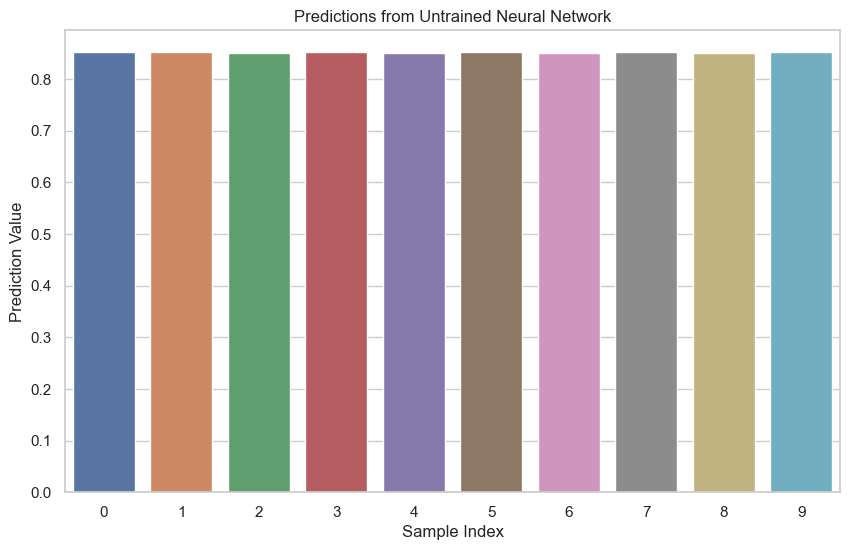

In [3]:
# Initialize the network
network = SimpleNeuralNetwork()

# Generate random input data (10 samples, 3 features)
input_data = torch.rand(10, 3)

# Get predictions from the untrained network
predictions = network(input_data).detach().numpy()

# Prepare the data for plotting
df = pd.DataFrame(predictions, columns=['Predictions'])

# Plot the predictions by using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=df.index, y='Predictions', data=df)
plt.title('Predictions from Untrained Neural Network')
plt.xlabel('Sample Index')
plt.ylabel('Prediction Value')
plt.show()

Step 2: <span style="background-color:lightyellow"> Build the Trainable Neural Network </span>
1. Modify the network so that the weights and biases are trainable (requires_grad=True).
2. Use the **Stochastic Gradient Descent (SGD)** optimizer and **Mean Squared Error (MSE) loss function**.
3. Deliverable: A Python script that shows both the initial predictions **before training** and the updated predictions **after training**.

In [4]:
# Generate random input data (10 samples, 3 features) and target data
input_data = torch.rand(10, 3)
target_data = torch.rand(10, 1)

# Define the loss function (Mean Squared Error) and optimizer (SGD)
criterion = nn.MSELoss()
optimizer = optim.SGD(network.parameters(), lr=0.1)

# Show initial predictions before training
with torch.no_grad():
    initial_predictions = network(input_data).detach().numpy()



**Step 3**: **<span style="background-color:lightyellow">Implement the Training Loop <span>**
    
1. Implement a training loop that runs for **100 epochs**.
2. For each epoch, update the trainable parameters using the optimizer and calculate the loss using the true and predicted outputs.
3. Print the **total loss after each epoch**.
4. Deliverable: A script that **prints the loss after each epoch** to track progress.

In [5]:
# Training loop for 100 epochs
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()  # Clear gradients
    
    # Forward pass: compute predictions
    predictions = network(input_data)
    
    # Compute the loss between predicted and true outputs
    loss = criterion(predictions, target_data)
    
    # Backward pass: compute gradients
    loss.backward()
    
    # Update the weights using the optimizer
    optimizer.step()
    
    # Print the loss for each epoch to track progress
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Show final predictions after training
with torch.no_grad():
    final_predictions = network(input_data).detach().numpy()


Epoch [1/100], Loss: 0.1761
Epoch [2/100], Loss: 0.1662
Epoch [3/100], Loss: 0.1554
Epoch [4/100], Loss: 0.1441
Epoch [5/100], Loss: 0.1325
Epoch [6/100], Loss: 0.1211
Epoch [7/100], Loss: 0.1106
Epoch [8/100], Loss: 0.1015
Epoch [9/100], Loss: 0.0943
Epoch [10/100], Loss: 0.0890
Epoch [11/100], Loss: 0.0855
Epoch [12/100], Loss: 0.0834
Epoch [13/100], Loss: 0.0822
Epoch [14/100], Loss: 0.0815
Epoch [15/100], Loss: 0.0812
Epoch [16/100], Loss: 0.0811
Epoch [17/100], Loss: 0.0810
Epoch [18/100], Loss: 0.0810
Epoch [19/100], Loss: 0.0809
Epoch [20/100], Loss: 0.0809
Epoch [21/100], Loss: 0.0809
Epoch [22/100], Loss: 0.0809
Epoch [23/100], Loss: 0.0809
Epoch [24/100], Loss: 0.0809
Epoch [25/100], Loss: 0.0809
Epoch [26/100], Loss: 0.0809
Epoch [27/100], Loss: 0.0809
Epoch [28/100], Loss: 0.0809
Epoch [29/100], Loss: 0.0809
Epoch [30/100], Loss: 0.0809
Epoch [31/100], Loss: 0.0809
Epoch [32/100], Loss: 0.0809
Epoch [33/100], Loss: 0.0809
Epoch [34/100], Loss: 0.0809
Epoch [35/100], Loss: 0

**Step 4**:**<span style="background-color:lightyellow"> Visualization <span>**
1. After training, plot the final predictions using seaborn.
2. Compare the network’s predictions **before** and **after** training using line plots.
3. Deliverable: **Two plots**: **one** showing the network’s output before training, and **another** showing the output after training.

In [6]:
# Prepare data for plotting
df = pd.DataFrame({
    'Sample Index': range(1, 11),
    'Initial Predictions': initial_predictions.flatten(),
    'Final Predictions': final_predictions.flatten(),
    'Target Data': target_data.flatten()
})

Why Use a DataFrame:
    
1. Organization: Cleanly stores multiple types of data.
2. Integration: Works smoothly with plotting libraries like Seaborn.
3. Manipulation: Makes it easier to preprocess or analyze the data.
4. Readability: Simplifies plotting commands by referencing columns instead of manually passing arrays.

Although you could achieve the same result with lists or arrays, pandas.DataFrame improves code readability and maintainability, especially when working with complex datasets.

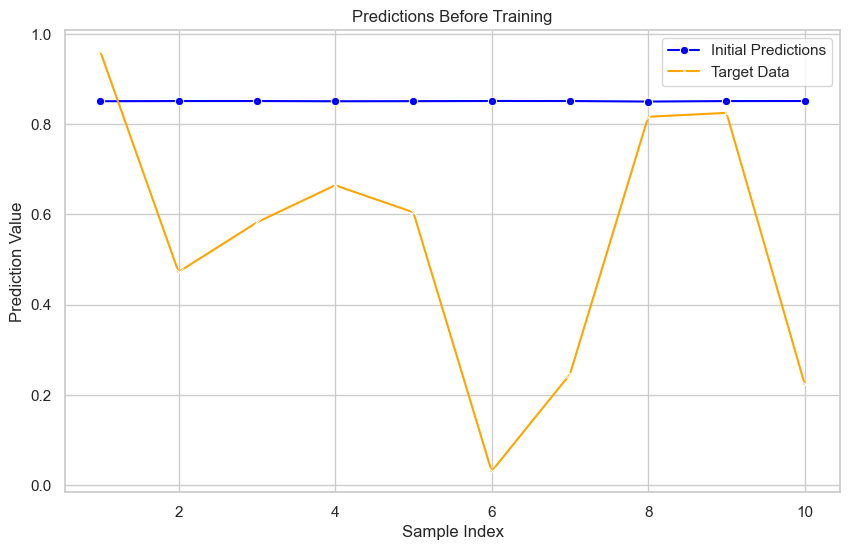

In [7]:
# Plot the initial predictions before training
plt.figure(figsize=(10, 6))
sns.lineplot(x='Sample Index', y='Initial Predictions', data=df, label='Initial Predictions', color='blue', marker="o")
sns.lineplot(x='Sample Index', y='Target Data', data=df, label='Target Data', color='orange', marker="x")
plt.title('Predictions Before Training')
plt.xlabel('Sample Index')
plt.ylabel('Prediction Value')
plt.legend()
plt.show()

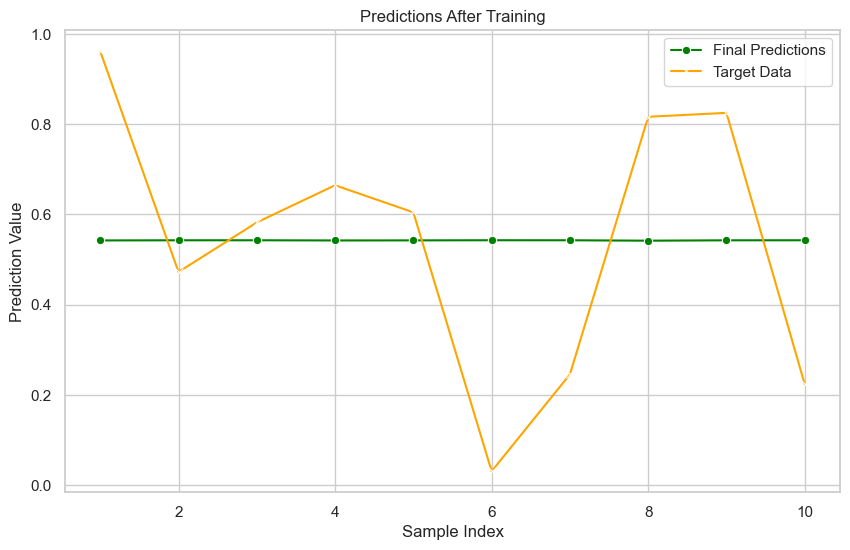

In [8]:
# Plot the final predictions after training
plt.figure(figsize=(10, 6))
sns.lineplot(x='Sample Index', y='Final Predictions', data=df, label='Final Predictions', color='green', marker="o")
sns.lineplot(x='Sample Index', y='Target Data', data=df, label='Target Data', color='orange', marker="x")
plt.title('Predictions After Training')
plt.xlabel('Sample Index')
plt.ylabel('Prediction Value')
plt.legend()
plt.show()

